In [1]:
#!pip install scikit-learn==0.23.2 --force-reinstall 
#!pip install imbalanced-learn==0.6.2 --force-reinstall

In [2]:
import matplotlib.pyplot as plt
from azureml.core import Dataset
from azureml.data.dataset_factory import DataType
from azureml.data.dataset_factory import TabularDatasetFactory
from cleandata import clean_data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from azureml.core import Workspace, Experiment

ws = Workspace.get(name="quick-starts-ws-123082")

Using TensorFlow backend.


In [3]:
ds = TabularDatasetFactory.from_delimited_files("https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv", validate=True, include_path=False, infer_column_types=True, set_column_types=None, separator=',', header=True, partition_format=None, support_multi_line=False, empty_as_string=False)
x, y = clean_data(ds)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42);

In [4]:
data_train = x
data_train['y'] = y
feature_names = list(data_train.columns)

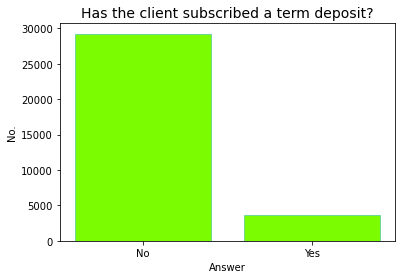

In [5]:
plt.bar(['No', 'Yes'], data_train.y.value_counts().values, facecolor = 'lawngreen', edgecolor='lightseagreen', linewidth=0.5)
plt.title('Has the client subscribed a term deposit?', fontsize=14)
plt.xlabel('Answer')
plt.ylabel('No.')
plt.show()

In [6]:
!conda install -y scikit-learn
import imblearn; imblearn.show_versions(github=True)

Solving environment: done

## Package Plan ##

  environment location: /anaconda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    conda-4.9.0                |           py38_0         2.9 MB
    intel-openmp-2020.2        |              254         786 KB
    libgfortran-ng-7.3.0       |       hdf63c60_0        1006 KB
    mkl-2020.2                 |              256       138.3 MB
    mkl-service-2.3.0          |   py38he904b0f_0          62 KB
    mkl_fft-1.2.0              |   py38h23d657b_0         157 KB
    mkl_random-1.1.1           |   py38h0573a6f_0         341 KB
    numpy-1.19.2               |   py38h54aff64_0          22 KB
    numpy-base-1.19.2          |   py38hfa32c7d_0         4.2 MB
    scikit-learn-0.23.2        |   py38h0573a6f_0         5.2 MB
    scipy-1.5

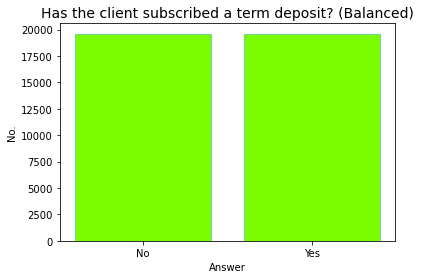

In [12]:
smote = SMOTE(random_state=0)
x_balanced, y_balanced = smote.fit_resample(x_train, y_train)

plt.bar(['No', 'Yes'], [sum(y_balanced), len(y_balanced)-sum(y_balanced)], facecolor = 'lawngreen', edgecolor='lightseagreen', linewidth=0.5)
plt.title('Has the client subscribed a term deposit? (Balanced)', fontsize=14)
plt.xlabel('Answer')
plt.ylabel('No.')
plt.show()

In [8]:
data_balanced = x_balanced
data_balanced['y'] = y_balanced
data_balanced.head()

,age,marital,default,housing,loan,month,day_of_week,last_contact_duration,campaign,pdays,...,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
0,40,1,0,1,0,11,4,377,3,999,...,0,1,0,0,0,0,0,0,0,0
1,44,0,0,1,0,7,4,155,11,999,...,0,0,0,0,0,0,0,1,0,0
2,26,0,0,0,0,3,4,139,1,999,...,0,0,0,0,0,0,0,1,0,1
3,29,0,0,1,0,7,2,303,1,999,...,0,0,0,0,1,0,0,0,0,0
4,38,1,0,0,0,5,3,234,2,999,...,1,0,1,0,0,0,0,0,0,0


In [9]:
data_validation = x_test
data_validation['y'] = y_test
data_validation.head()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,marital,default,housing,loan,month,day_of_week,last_contact_duration,campaign,pdays,...,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
20628,58,1,0,1,0,7,2,614,1,999,...,0,1,0,0,0,0,0,0,0,0
4344,44,1,0,1,0,8,4,79,1,999,...,0,1,0,0,0,0,0,0,0,0
20933,58,1,0,0,0,8,2,373,4,999,...,0,0,0,0,0,0,0,1,0,0
4641,49,1,0,1,0,6,3,81,3,999,...,1,0,1,0,0,0,0,0,0,0
4638,42,1,0,1,0,11,1,252,1,999,...,0,0,0,0,1,0,0,0,0,0


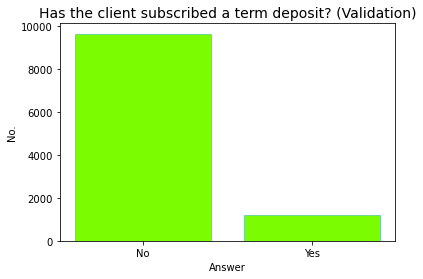

In [10]:
plt.bar(['No', 'Yes'], data_validation.y.value_counts().values, facecolor = 'lawngreen', edgecolor='lightseagreen', linewidth=0.5)
plt.title('Has the client subscribed a term deposit? (Validation)', fontsize=14)
plt.xlabel('Answer')
plt.ylabel('No.')
plt.show()

In [11]:
if "data" not in os.listdir():
    os.mkdir("./data")

local_path = './data/data_balanced.csv'
data_train.to_csv(local_path)

validation_path = './data/data_validation.csv'
data_validation.to_csv(validation_path)

datastore = ws.get_default_datastore()

datastore.upload(src_dir='data', target_path='data', overwrite=True)

Uploading an estimated of 2 files
Uploading data/data_validation.csv
Uploaded data/data_validation.csv, 1 files out of an estimated total of 2
Uploading data/data_balanced.csv
Uploaded data/data_balanced.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_6feb5a8b52f8409298cd07bde8e19a4b